# White box models
* Trying to figure out what makes white-box transparent and *interpretable*.
* Intepretting simpel models, such as linear regression and decision trees.
* What GAMs (Generalized Additive Models) are, and why they can be highly predictive 
    as well as predictive.
* How to implement and interpret a GAM.
* The differences between black box models.

#### Three white box models (and a bonus)
1. Linear Regression (used within ML for Regression)
2. Decision Trees (used for regression for classification)
3. GAMs (used for regression for classification)
4. Logistic Regression -- (used for regression for classification)

These models are inherently transparent and the important charactersitics that make
them transparent:
* The algorithm being used is straightforward to understand, and we can clearly understand how an input feature is mapped to an output or target variable.
* We can identify the most important features to predict the target variable.

In [48]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
x,y = diabetes['data'], diabetes['target']

Now, create a Panas dataframe, which is a two-dimensional data structure that contains all the features and the target variable. In this case, the diabetes datasert has feature names that are not easy to understand, the six blood samples are named "s1, s2, ... s6" which is rather opaque.

In [49]:
import pandas as pd 
feature_rename = {'age': 'Age',                                 
                  'sex': 'Sex',                                 
                  'bmi': 'BMI',                                 
                  'bp': 'BP',                                   
                  's1': 'Total Cholesterol',                    
                  's2': 'LDL',                                  
                  's3': 'HDL',                                  
                  's4': 'Thyroid',                              
                  's5': 'Glaucoma',                             
                  's6': 'Glucose'}                              
 
df_data = pd.DataFrame(x,                                       
                       columns=diabetes['feature_names'])       
df_data.rename(columns=feature_rename, inplace=True)   
feature_names = list(df_data.columns.values)         
df_data['target'] = y  


Now, let's compute the pairwise correlation of columns to determine how correlated
each of the input features is with each other.

In [50]:
correlations = df_data.corr()

By default, the corr() function in pandas computes the Pearson or standard correlation coefficient. This coefficient measures the linear correlation between two variables and has a value between +1 and –1. If the magnitude of the coefficient is above 0.7, that means it’s a really high correlation. If the magnitude of the coefficient is between 0.5 and 0.7, that indicates a moderately high correlation. If the magnitude of the coefficient is between 0.3 and 0.5, that means a low correlation, and a magnitude less than 0.3 means there is little to no correlation.

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Sex'),
 Text(2.5, 0, 'BMI'),
 Text(3.5, 0, 'BP'),
 Text(4.5, 0, 'Total Cholesterol'),
 Text(5.5, 0, 'LDL'),
 Text(6.5, 0, 'HDL'),
 Text(7.5, 0, 'Thyroid'),
 Text(8.5, 0, 'Glaucoma'),
 Text(9.5, 0, 'Glucose'),
 Text(10.5, 0, 'target')]

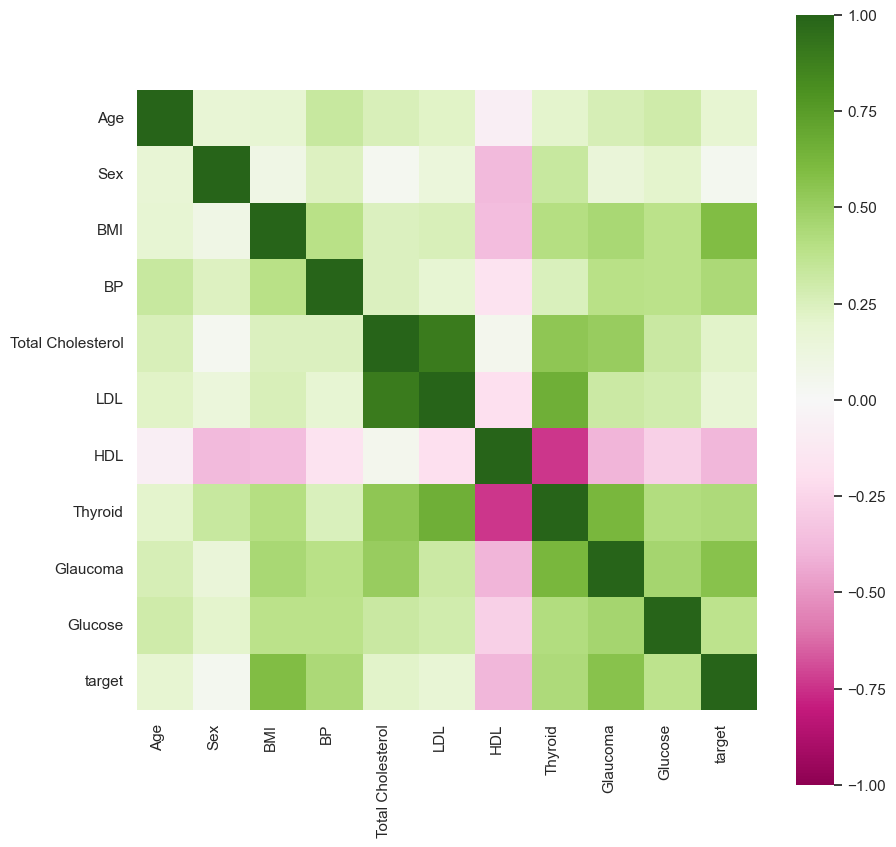

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn is used to create a heatmap
sns.set(style='whitegrid')
sns.set_palette('bright')

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap( correlations,
             vmin=-1, vmax=1, center=0,
             cmap="PiYG",
             square=True,
             ax=ax)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)




So, BMI, Glaucoma, Glucose, BP certainly are moderately to highly correlated with the "target" (which, is the progression of diabetes).
A few others, such as Total cholesterol, Glucose are also correlated positively, where as HDL is highly correlated negatively.

## Linear Regression

This is one of the simplest models that can be trained for regression tasks. It's just a sum of all weights formulation:

f(x1, x2, x3, ... xn) = weight_0 + for (i=1, ... i=n) { weight_i * xi }

Where determining the weights is done through, usually a closed form solution such as Newton equation (?), or
Gradient descent method (which is very commonly used). GD scales well.


In [52]:
from sklearn.model_selection import train_test_split            
from sklearn.linear_model import LinearRegression               
import numpy as np  

# split the data into training and test sets, using 80% of the data for training and 20%
# for testing, as well as setting the random 'state' to something we can reproduce.
X_train, X_test, y_train, y_test = train_test_split(x, y,       
    test_size=0.2,                                                
    random_state=42) 

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
# make some predictions
y_pred = linear_regression_model.predict(X_test)
# evalute the model using the "MEA -- mean absolute error" metric
mae = np.mean( np.abs( y_test - y_pred) )
print("Mean absolute erorr: ", mae)

Mean absolute erorr:  42.794094679599944


So... is 42.8 any good? 

To determine that we need a baseline. In this case, the baseline model was 62.2, we had a 
drop of almost 20.

In [53]:
import math
from sklearn.metrics import mean_squared_error
# Baseline performance 
y_base = np.median(y_test)
base_mae = np.mean( np.abs(y_test - y_base))
print("Baseline performance (via mae): %4.2f" % (base_mae))

rmse = math.sqrt(mean_squared_error(y_test, [y_base for _ in range(len(y_test))]))
print("RMSE for the baseline is %4.2f" % rmse)

mape = np.mean(np.abs(y_test - y_base) / y_test ) * 100
print("MAPE for baseline is %4.2f" % mape)

Baseline performance (via mae): 62.21
RMSE for the baseline is 74.70
MAPE for baseline is 51.59


In [54]:
baseline_mae = 62.2
change_in_mae = 100 * np.abs( baseline_mae - mae) / max( baseline_mae, mae)
print("The change in the model is %4.2f percent" % (change_in_mae))

The change in the model is 31.20 percent


This is a pretty good improvement, the error has been reduced by almost a third. However,
we don't have any real sense of how the model arrived at this prediction, or which
features are important. 

There are other measures, such as Root Mean Squared Error, RSME, and also 
Mean Absolute Percentage Error, MAPE. MAPE is expressed in a percentage, and
so gives more context (which is what I did above).

In short, we want something more interpretable!

In [55]:
# Fully evaluating our LR Model
mae = np.mean(np.abs(y_test - y_pred))
print("The Linear Regression model MAE performacne is %4.2f" % mae)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The RMSE of the Linear Regression model is %4.2f" % rmse)

mape = np.mean(np.abs(y_test - y_pred) / y_test) * 100
print("The Linear Regression model MAPE is %4.2f" % mape)


The Linear Regression model MAE performacne is 42.79
The RMSE of the Linear Regression model is 53.85
The Linear Regression model MAPE is 37.50


['Age', 'Sex', 'BMI', 'BP', 'Total Cholesterol', 'LDL', 'HDL', 'Thyroid', 'Glaucoma', 'Glucose']


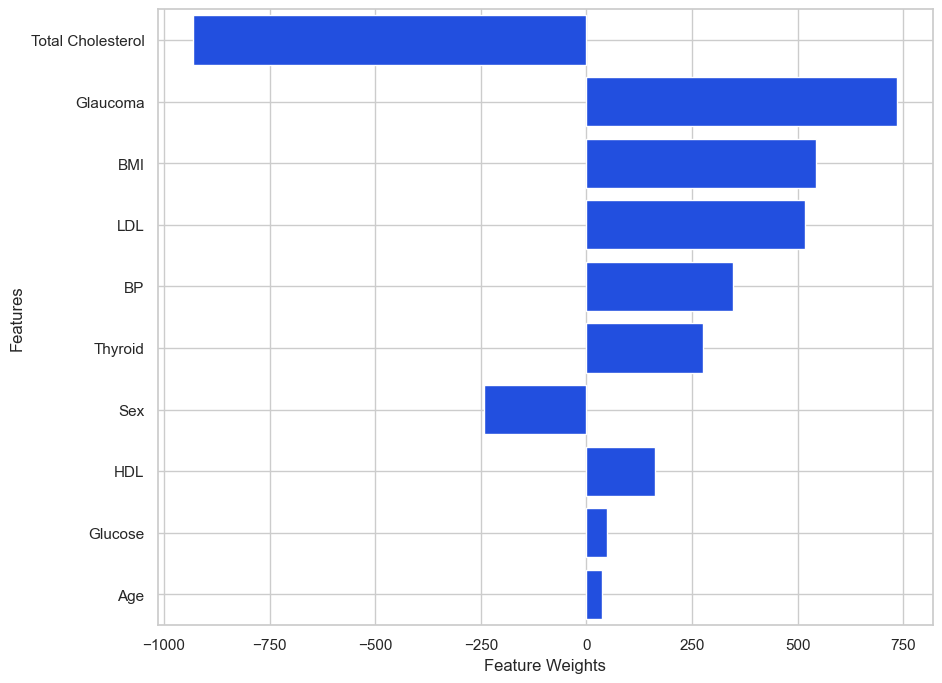

In [56]:
# Let's interpret the Linear Regression Model
print(feature_names)

weights = linear_regression_model.coef_
feature_importance_idx = np.argsort(np.abs(weights))[::-1]
feature_importance = [feature_names[idx] for idx in feature_importance_idx]
feature_importance_values = [weights[idx] for idx in feature_importance_idx]
f, ax = plt.subplots(figsize=(10,8))
sns.set_palette('bright')
sns.set(style='whitegrid')
sns.barplot(x=feature_importance_values, y=feature_importance, ax=ax)
ax.grid(True)
ax.set_xlabel('Feature Weights')
ax.set_ylabel('Features')
f.savefig('linear_regression_feature_importance.png', dpi=300, bbox_inches='tight')
f.savefig('linear_regression_feature_importance.pdf', format='pdf', dpi=300, bbox_inches='tight')

The graph shows that "Total Cholesterol" is the most important feature, having a 
very strong negative value, meaning that a positive change in the cholesterol level 
has a large negative influence on predicint the diabetes progression. 

This might be because Total cholesterol accounts for HDL (Good Cholesterol) as well.


Okay, so we can interpet the model, in that we have strong correlations that we can 
make inferences from. However, Linear Regression has poor predictive power, especially 
in the case that the input-output relationship is nonlinear.



## Decision Trees

This is a great learning algorithm that can be used to model complex nonlinear relationships. It works well 
for both regression and classification tasks and has relatively higher predictive power than 
linear regression but also highly interpretable as well! 

The basic idea behind a decision tree is to find optimum splits in the data that best predict
the output or target variable. 

In [76]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(max_depth=None, 
                                            random_state=42
                                            )
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
mae = np.mean( np.abs(y_test-y_pred))
print("Decision tree MAE (depth None) is \t%4.2f" % mae)

# let's change the max_depth
decision_tree_model = DecisionTreeRegressor(max_depth=3, 
                                            random_state=42
                                            )
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
mae = np.mean( np.abs(y_test-y_pred))
print("Decision tree MAE (depth 3) is \t\t%4.2f" % mae)

decision_tree_model = DecisionTreeRegressor(max_depth=1, 
                                            random_state=42
                                            )
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
mae = np.mean( np.abs(y_test-y_pred))
print("Decision tree MAE (depth 1) is \t\t%4.2f" % mae)

decision_tree_model = DecisionTreeRegressor(max_depth=7, 
                                            random_state=42
                                            )
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
mae = np.mean( np.abs(y_test-y_pred))
print("Decision tree MAE (depth 7) is \t\t%4.2f" % mae)

decision_tree_model = DecisionTreeRegressor(max_depth=5, 
                                            random_state=42
                                            )
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
mae = np.mean( np.abs(y_test-y_pred))
print("Decision tree MAE (depth 5) is \t\t%4.2f" % mae)



Decision tree MAE (depth None) is 	54.53
Decision tree MAE (depth 3) is 		48.10
Decision tree MAE (depth 1) is 		56.51
Decision tree MAE (depth 7) is 		50.37
Decision tree MAE (depth 5) is 		45.94


## Interpreting Decision Trees

These are wonderful tools for modeling nonlinear relationships between input and
output. By finding splits across the data features the model tends to learn a function that is
nonlinear in nature. The function could be monotonic, a change in the input
results in a corresponding change in the output (in the same direction), or the
function could be non-monotonic, meaning a change in the input could result in
a change in the output in any direction.

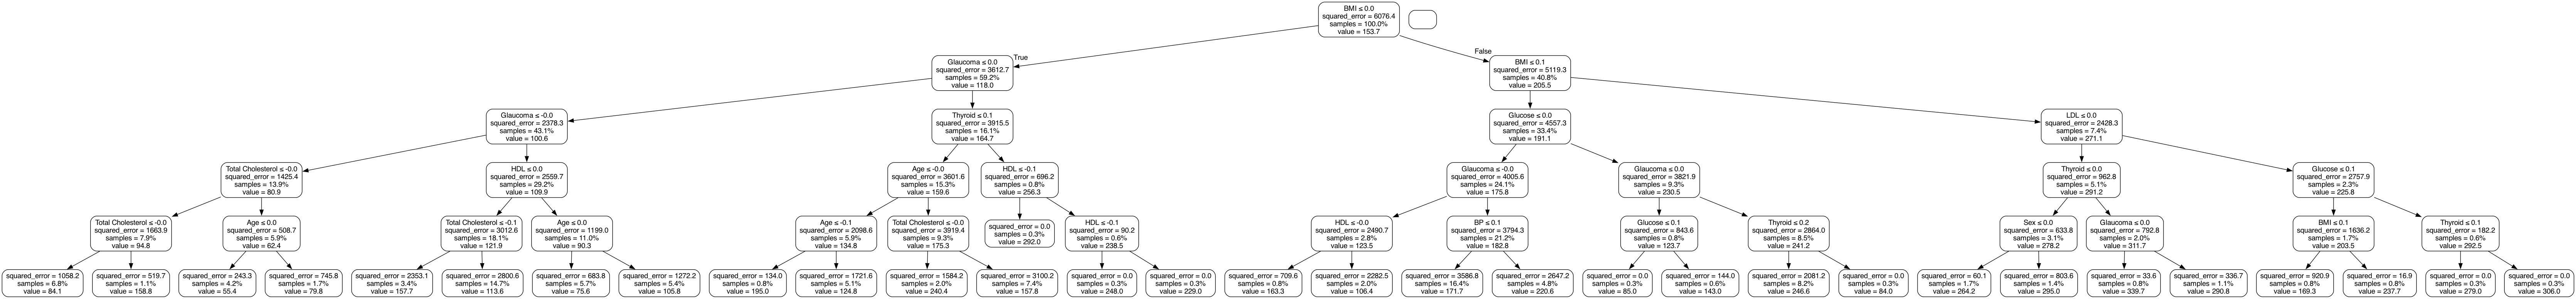

In [77]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO 

diabetes_dt_dot_data = StringIO()
export_graphviz(decision_tree_model, 
                out_file=diabetes_dt_dot_data,
                filled=False, rounded=True,
                feature_names=feature_names,
                proportion=True,
                precision=1,
                special_characters=True)                                   
dt_graph = pydotplus.graph_from_dot_data(diabetes_dt_dot_data.getvalue())  
Image(dt_graph.create_png())  

Text(0, 0.5, 'Features')

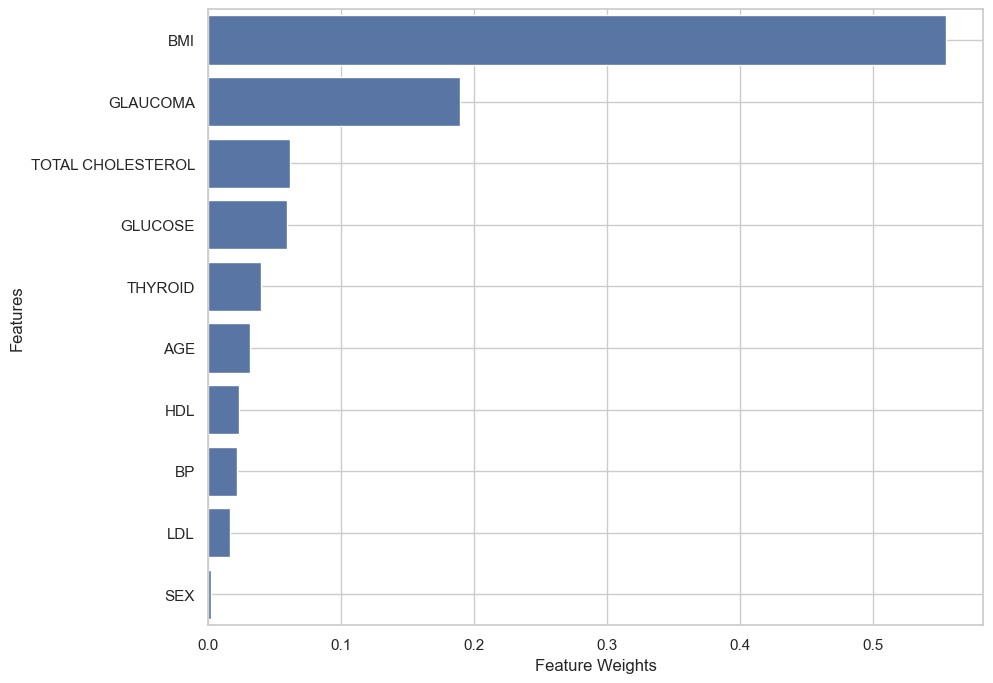

In [78]:
weights = decision_tree_model.feature_importances_

feature_importance_idx = np.argsort(np.abs(weights))[::-1]
feature_importance = [feature_names[idx].upper() for idx in feature_importance_idx]
feature_importance_values = [weights[idx] for idx in feature_importance_idx]

f,ax = plt.subplots(figsize=(10,8))
sns.barplot(x=feature_importance_values, 
            y=feature_importance, ax=ax)
ax.grid(True)
ax.set_xlabel('Feature Weights')
ax.set_ylabel('Features')


### Limitations of Decision Trees

Decision trees are quite versatile because they can be applied to both regression and classification tasks, and they also have the ability to model nonlinear relationships. The algorithm, however, is prone to the problem of overfitting and the model is said to have high variance.

## Generalized Additive Models (GAMs)

GAMs are models that have moderate to high predictive power and yet are highly interpretable. So far, we've seen that the Linear Regression model is pretty good, but doesn't explain features that are highly correlated (in this case, Total Cholesterol, LDL, and HDL). 

The decision tree starts to break down those correlated features but doesn't perform as well, and also raises the risk of overfitting.

GAMs often use regression splines (B-splines, wow, that's a blast from the past -- but B-splies are essentially 3rd degree polynomials used in curve fitting). This allows each feature to have a "smoothing function" that best models the relationship between feature and target.

The sum of splines is used to fit the relationship, and finding the weights of each spline becomes a linear regression problem. 

Of course, GAMs can easily overfit the data by increasing the number of splines. We can prevent this via a technique called regularization, where we 
add a term to the least square cost function that quantifies the noise (or wiggle). 

In [81]:
from pygam import LinearGAM
from pygam import s
from pygam import f

gam = LinearGAM(s(0) + # cubic Spline term for Age
                f(1) + # factor term for Sex, this is categorical
                s(2) + # cubic Spline for BMMI
                s(3) + # cubic spline for ...
                s(4) +
                s(5) + 
                s(6) + 
                s(7) + 
                s(8) + 
                s(9), n_splines=35)

gam.gridsearch(X_train, y_train)
y_pred = gam.predict(X_test)
mae = np.mean(np.abs(y_test - y_pred))
print("MAE is %4.2f" % mae)


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:04
 18% (2 of 11) |####                     | Elapsed Time: 0:00:01 ETA:   0:00:05
 27% (3 of 11) |######                   | Elapsed Time: 0:00:01 ETA:   0:00:05
 36% (4 of 11) |#########                | Elapsed Time: 0:00:02 ETA:   0:00:04
 45% (5 of 11) |###########              | Elapsed Time: 0:00:03 ETA:   0:00:03
 54% (6 of 11) |#############            | Elapsed Time: 0:00:03 ETA:   0:00:03
 63% (7 of 11) |###############          | Elapsed Time: 0:00:04 ETA:   0:00:02
 72% (8 of 11) |##################       | Elapsed Time: 0:00:05 ETA:   0:00:01
 81% (9 of 11) |####################     | Elapsed Time: 0:00:05 ETA:   0:00:01
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:06 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


MAE is 41.38


In [83]:
# another way to train a binary classifier is through a GAM
""" 
from pygam import LogisticGAM
binary_gam = LogisticGAM()
binary_gam.gridsearch(X_train, y_train)
y_pred = binary_gam.predict(X_test)
mae = np.mean(np.abs(y_test - y_pred))
print("MAE via the binary classifier is %4.2f" % mae)
"""
# not exercising this because the 'gridsearch' needs the data in the range of a logistic function [0,1]

              

' \nfrom pygam import LogisticGAM\nbinary_gam = LogisticGAM()\nbinary_gam.gridsearch(X_train, y_train)\ny_pred = binary_gam.predict(X_test)\nmae = np.mean(np.abs(y_test - y_pred))\nprint("MAE via the binary classifier is %4.2f" % mae)\n'

In [85]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE %4.2f" % rmse)

mape = np.mean(np.abs(y_test - y_pred) / y_test) * 100
print("MAPE %4.2f" % mape)


RMSE 52.23
MAPE 35.67


#### Let's interpret the GAM

['Age', 'Sex', 'BMI', 'BP', 'Total Cholesterol', 'LDL', 'HDL', 'Thyroid', 'Glaucoma', 'Glucose']


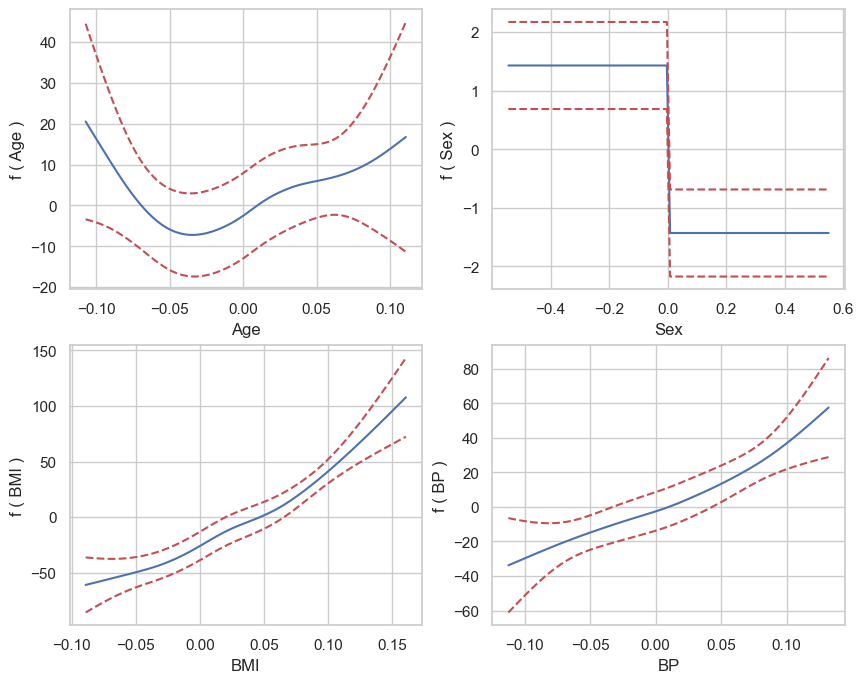

In [87]:
print(feature_names)

grid_locs1 = [(0, 0), (0, 1),
              (1, 0), (1, 1)]
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i, feature in enumerate(feature_names[:4]):
    gl = grid_locs1[i]
    XX = gam.generate_X_grid(term=i)
    ax[gl[0], gl[1]].plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax[gl[0], gl[1]].plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax[gl[0], gl[1]].set_xlabel('%s' % feature)
    ax[gl[0], gl[1]].set_ylabel('f ( %s )' % feature)
fig.savefig('gam_pdp_first_four_features.png', dpi=300, bbox_inches='tight');
fig.savefig('gam_pdp_first_four_features.pdf', format='pdf', dpi=300, bbox_inches='tight');

The effect of BMI on the target variable is shown in the bottom-left graph. On the x-axis, we see the normalized values of BMI, and on the y-axis, we see the effect that BMI has on the progression of diabetes for the patient. We see that as BMI increases, the effect on the progression of diabetes also increases. We see a similar trend for BP shown by the bottom-right graph. We see that the higher the BP, the higher the impact on the progression of diabetes. If we look at the 95% confidence interval lines (the dashed lines in figure 2.21), we see a wider confidence interval around the lower and higher ends of BMI and BP. This is because fewer samples of patients exist at this range of values, resulting in higher uncertainty in understanding the effects of these features at those ranges.

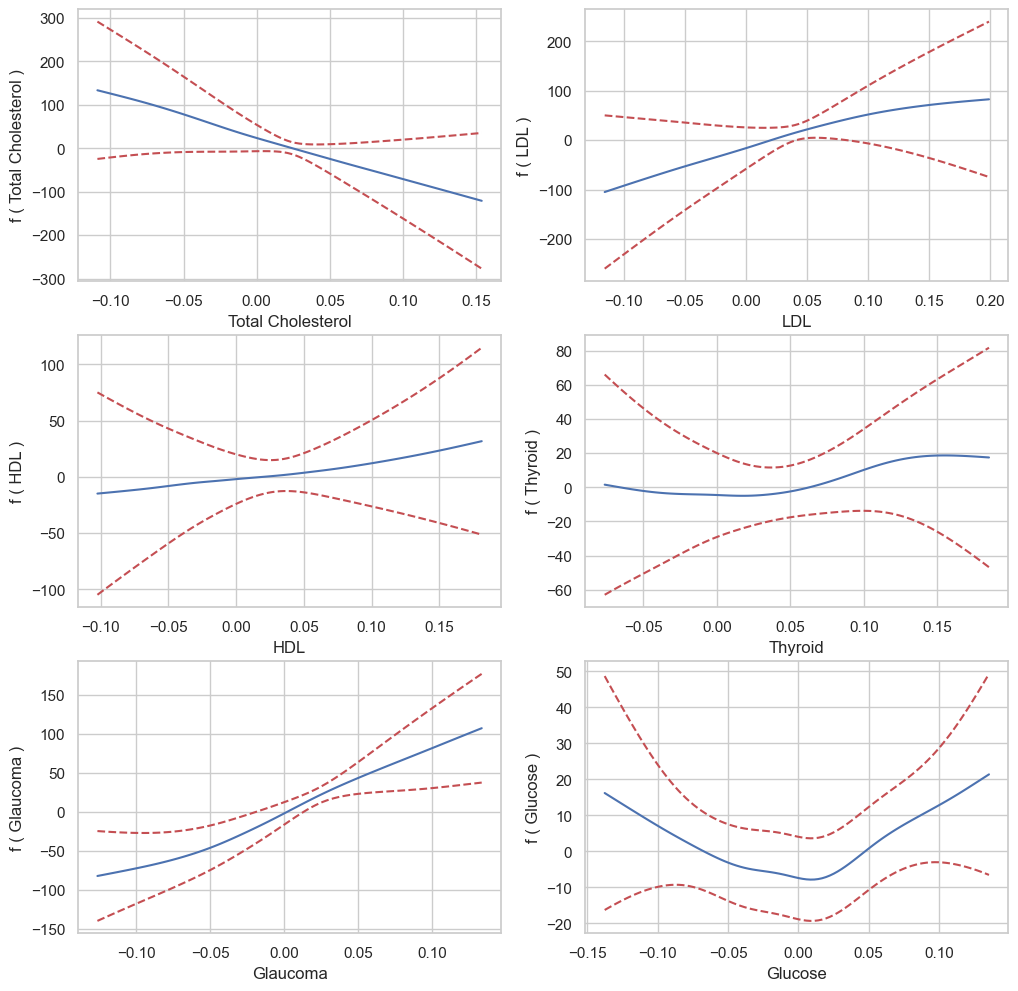

In [89]:
grid_locs2 = [(0, 0), (0, 1),
             (1, 0), (1, 1),
             (2, 0), (2, 1)]
fig2, ax2 = plt.subplots(3, 2, figsize=(12, 12))
for i, feature in enumerate(feature_names[4:]):
    idx = i + 4
    gl = grid_locs2[i]
    XX = gam.generate_X_grid(term=idx)
    ax2[gl[0], gl[1]].plot(XX[:, idx], gam.partial_dependence(term=idx, X=XX))
    ax2[gl[0], gl[1]].plot(XX[:, idx], gam.partial_dependence(term=idx, X=XX, width=.95)[1], c='r', ls='--')
    ax2[gl[0], gl[1]].set_xlabel('%s' % feature)
    ax2[gl[0], gl[1]].set_ylabel('f ( %s )' % feature)
fig2.savefig('chapter_02_gam_pdp_blood_serum_features.png', dpi=300, bbox_inches='tight');
fig2.savefig('chapter_02_gam_pdp_blood_serum_features.pdf', format='pdf', dpi=300, bbox_inches='tight');

By plotting the 95% confidence interval around the partial dependence values, we can also see data points with low sample sizes. If a feature value with a low sample size has a dramatic effect on the target, then there could be an overfitting problem. We can also visualize the wiggliness of the smoothing function to determine whether the model has fit on the noise in the data. We can fix these overfitting problems by increasing the value of the regularization parameter. These partial dependence plots can also be shared with the SME—doctors, in this case—for validation which will help gain their trust.